In [1]:
import import_ipynb
import IntimeLibrary as il
import FlieLibrary as fl
import pandas as pd
import numpy as np

importing Jupyter notebook from IntimeLibrary.ipynb
importing Jupyter notebook from FlieLibrary.ipynb


In [2]:
fl.depart_flight.drop(['항공사',"TM","DelayRate"], axis=1, inplace=True)
fl.depart_flight = pd.get_dummies(fl.depart_flight, columns=["ORIGIN","DEST", "weekend","현황"])

In [3]:
fl.depart_flight

,날짜,time,ORIGIN_김포공항,ORIGIN_제주공항,DEST_김포공항,DEST_제주공항,weekend_FRI,weekend_MON,weekend_SAT,weekend_SUN,weekend_THU,weekend_TUE,weekend_WED,현황_지연,현황_출발,현황_취소,현황_회항
0,20181001,6,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
1,20181001,6,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,20181001,7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
3,20181001,7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
4,20181001,7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88626,20191001,20,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
88627,20191001,20,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
88628,20191001,20,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
88629,20191001,21,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(fl.depart_flight.drop("현황_출발", axis=1).drop("현황_지연",axis=1).drop("현황_회항",axis=1).drop("현황_취소",axis=1), fl.depart_flight["현황_출발"], test_size=0.4, random_state=42)

In [5]:
fl.depart_flight

,날짜,time,ORIGIN_김포공항,ORIGIN_제주공항,DEST_김포공항,DEST_제주공항,weekend_FRI,weekend_MON,weekend_SAT,weekend_SUN,weekend_THU,weekend_TUE,weekend_WED,현황_지연,현황_출발,현황_취소,현황_회항
0,20181001,6,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
1,20181001,6,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,20181001,7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
3,20181001,7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
4,20181001,7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88626,20191001,20,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
88627,20191001,20,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
88628,20191001,20,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
88629,20191001,21,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [6]:
train_x.shape

(53178, 13)

In [7]:
test_x.shape

(35453, 13)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

c:\users\kss09\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [9]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7791160127492737

In [10]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [11]:
roc_auc_score(test_y, probabilities[:, 1])

0.706315897475392

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[ 2698,  5006],
       [ 2825, 24924]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.8653803602248086

In [14]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9404833473608272

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

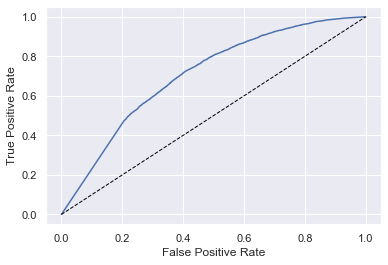

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [17]:
def predict_delay(departure_date_time, weekend, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    year = departure_date_time_parsed.year
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'날짜': year*10000+month*100+day,
              'time': hour,
              'ORIGIN_제주공항': 1 if origin == '제주' else 0,
              'ORIGIN_김포공항': 1 if origin == '김포' else 0,
              'DEST_제주공항': 1 if origin == '제주' else 0,
              'DEST_김포공항': 1 if destination == '김포' else 0,
              'weekend_FRI': 1 if destination == '금' else 0,
              'weekend_MON': 1 if destination == '월' else 0,
              'weekend_SAT': 1 if destination == '토' else 0,
              'weekend_SUN': 1 if destination == '일' else 0,
              'weekend_THU': 1 if destination == '목' else 0,
              'weekend_TUE': 1 if destination == '화' else 0,
              'weekend_WED': 1 if destination == '수' else 0
            }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [18]:
predict_delay('01/10/2018 06:30:00','월', '제주', '김포')

0.1

In [19]:
predict_delay('01/10/2019 21:20:00','화', '김포', '제주')

0.5444444444444444

(0.0, 1.0)

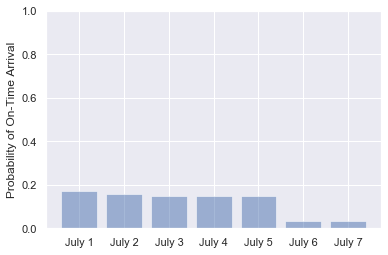

In [20]:
labels = ('July 1', 'July 2', 'July 3', 'July 4', 'July 5', 'July 6', 'July 7')
values = (predict_delay('1/07/2019 20:45:00', '월', '제주', '김포'),
          predict_delay('2/07/2019 20:45:00', '화', '제주', '김포'),
          predict_delay('3/07/2019 20:45:00', '수', '제주', '김포'),
          predict_delay('4/07/2019 20:45:00', '목', '제주', '김포'),
          predict_delay('5/07/2019 20:45:00', '금', '제주', '김포'),
          predict_delay('6/07/2019 20:45:00', '토', '제주', '김포'),
          predict_delay('7/07/2019 20:45:00', '일', '제주', '김포'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

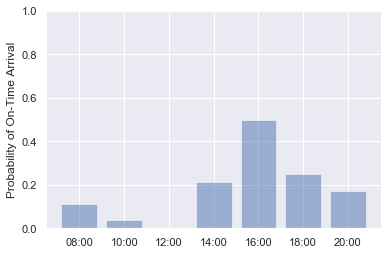

In [21]:
labels = ('08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00')
values = (predict_delay('1/07/2019 08:00:00', '월', '제주', '김포'),
          predict_delay('1/07/2019 10:00:00', '월', '제주', '김포'),
          predict_delay('1/07/2019 12:00:00', '월', '제주', '김포'),
          predict_delay('1/07/2019 14:00:00', '월', '제주', '김포'),
          predict_delay('1/07/2019 16:00:00', '월', '제주', '김포'),
          predict_delay('1/07/2019 18:00:00', '월', '제주', '김포'),
          predict_delay('1/07/2019 20:00:00', '월', '제주', '김포'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))